In [47]:
import pandas as pd  
import numpy as np 
import shap 
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import NuSVC
from sklearn.model_selection import train_test_split

In [37]:
iris = load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [38]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [43]:
iris_x = iris[iris.columns[:-1]]
iris_y = iris["target"].values

In [48]:
rfc = RandomForestRegressor()
rfc.fit(iris_x,iris_y)
svm = NuSVC()
svm.fit(iris_x,iris_y)

NuSVC(break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
      max_iter=-1, nu=0.5, probability=False, random_state=None, shrinking=True,
      tol=0.001, verbose=False)

In [49]:
explainer = shap.Explainer(rfc)
shap_values = explainer(iris_x)
shap.plots.waterfall(shap_values[1])

Exception: waterfall_plot requires a scalar base_values of the model output as the first parameter, but you have passed an array as the first parameter! Try shap.waterfall_plot(explainer.base_values[0], values[0], X[0]) or for multi-output models try shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0]).

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


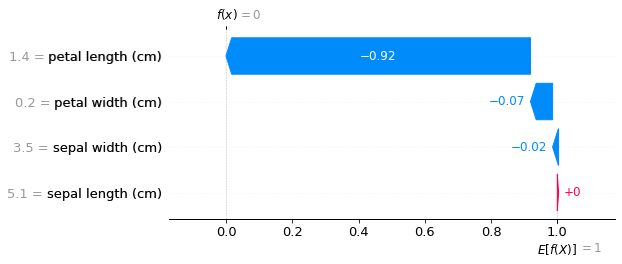

In [67]:
import xgboost
import shap

# train an XGBoost model
X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(iris_x, iris_y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(iris_x)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

In [53]:
shap_values.shape

(150, 4)

In [63]:
sum(shap_values.values[:,0]) / len(shap_values.values)

0.00031937032108943534

In [75]:
print(shap_values.values.mean(axis=0))
print(iris_x.columns)

[ 0.00381239 -0.00538167  0.03360047 -0.03203116]
Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


In [76]:
import matplotlib.pyplot as plt